In [31]:
#!pip install opencv-python
#!pip install pip --upgrade --user
!pip install visualkeras

In [32]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob
import visualkeras

In [33]:
directory=pathlib.Path("output_frames/TRAIN")

In [34]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpg"):
        # Your code comes here such as
        print(filename)
        data.append(filename)

In [35]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpg')))
#print(list(directory.glob('/*.jpg')))
image_count

5272

In [36]:
#creating dictionary of flower species
yoga_images={
    "Butterfly":list(directory.glob('Butterfly/*.jpg')),
    "Calf raises":list(directory.glob('Calf_raises/*.jpg')),
    "goddess":list(directory.glob('goddess/*.jpg')),
    "Hand raises":list(directory.glob('Hand_raises/*.jpg')),
    "Knee pushups":list(directory.glob('Knee_pushups/*.jpg')),
    "Lowerback strecth":list(directory.glob('Lowerback_strecth/*.jpg')),
    "Shoulder press":list(directory.glob('Shoulder_press/*.jpg')),
    "Shoulder strecth":list(directory.glob('Shoulder_strecth/*.jpg')),
    "situps":list(directory.glob('situps/*.jpg')),
    "tree":list(directory.glob('tree/*.jpg')),
    "wallChair":list(directory.glob('wallChair/*.jpg')),
    "Warmup":list(directory.glob('Warmup/*.jpg'))
}

In [37]:
yoga_images

{'Butterfly': [WindowsPath('output_frames/TRAIN/Butterfly/frame_0000.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0001.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0002.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0003.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0004.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0005.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0006.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0007.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0008.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0009.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0010.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0011.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0012.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0013.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0014.jpg'),
  WindowsPath('output_frames/TRAIN/Butterf

In [38]:
#Different species list
keys=['Butterfly', 'Calf raises','goddess','Hand raises','Knee pushups','Lowerback strecth','Shoulder press','shoulder stretch','situps','tree','wallChair','Warmup' ]

In [39]:
#resizing and creating labels using computer vision
resized,labels=[],[]
for yoga_name,images in yoga_images.items():
    for image in images:
        #print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        resized.append(resized_image)
        labels.append(keys.index(yoga_name))
yoga_images

{'Butterfly': [WindowsPath('output_frames/TRAIN/Butterfly/frame_0000.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0001.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0002.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0003.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0004.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0005.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0006.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0007.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0008.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0009.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0010.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0011.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0012.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0013.jpg'),
  WindowsPath('output_frames/TRAIN/Butterfly/frame_0014.jpg'),
  WindowsPath('output_frames/TRAIN/Butterf

In [40]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [41]:

from sklearn.model_selection import train_test_split
x_train,,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

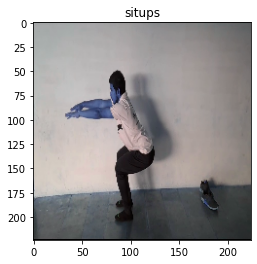

In [42]:
print_image(x_train[15],y_train[15])

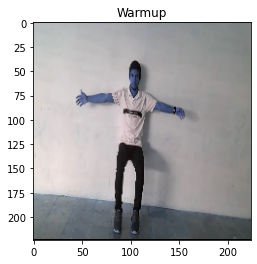

In [43]:
print_image(x_test[6],y_test[6])

In [47]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

MemoryError: Unable to allocate 2.08 GiB for an array with shape (1851, 224, 224, 3) and data type float64

In [ ]:
x_train_scaled.shape

In [ ]:
y_train=np.array(y_train)
y_train.shape

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model = VGG16(weights="imagenet")
for i in model.layers:
    i.trainable =  False

In [ ]:
model1 = Sequential()

# adding layers from pre-trained model
for i in range(18):
    model1.add(model.layers[i])

In [ ]:
model1.add(Flatten())
model1.add(Dense(4096,activation="relu"))
model1.add(Dense(2098,activation="relu"))
model1.add(Dense(512,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(12,activation="Softmax"))

In [ ]:
model1.summary()

In [ ]:
# model1.summary()
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model1.fit(x_train_scaled,np.array(y_train),epochs=20,callbacks=[callbacks])

In [ ]:
score = model1.evaluate(x_test_scaled,np.array(y_test))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model1.save("PhysioNet.h5")

In [ ]:
 # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

In [ ]:

visualkeras.layered_view(model1)